In [10]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#load data
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11485184/11490434 [============================>.] - ETA: 0s

5


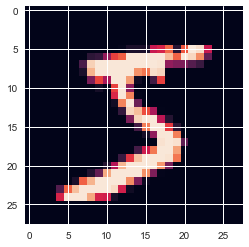

In [12]:
plt.imshow(X_train[0])
print(y_train[0])

In [13]:
print("train features: {}; train labels: {}".format(X_train.shape, y_train.shape))
print("test features: {}; test labels: {}".format(X_test.shape, y_test.shape))

train features: (60000, 28, 28); train labels: (60000,)
test features: (10000, 28, 28); test labels: (10000,)


In [25]:
#reshape data
from keras.utils import to_categorical

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test_mat = to_categorical(y_test, num_classes=10)

In [38]:
# create model

from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(10, kernel_size=3, input_shape=(28, 28, 1)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
#training model

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='loss', min_delta=0, patience=2, verbose=1, mode='auto')
model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, verbose=1, callbacks=[es])

Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.2623 - acc: 0.9721     
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2578 - acc: 0.9721     
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 0.2457 - acc: 0.9732     
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 0.2431 - acc: 0.9734     
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2432 - acc: 0.9731     
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.2386 - acc: 0.9731     
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.2305 - acc: 0.9741     
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.2355 - acc: 0.9726     
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.2323 - acc: 0.9732     
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.2302 - acc: 0.9729     
Epoch 11/50
60000/60000 [========================

In [42]:
model.evaluate(X_test, y_test_mat, verbose=1)

 9440/10000 [===========================>..] - ETA: 0s

[0.19895271013987562, 0.96960000000000002]